<a href="https://colab.research.google.com/github/jpoist97/lab-3-phase-2-jpoist97/blob/main/DATA_301_Lab_3_Justin_Poist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [1]:
import pandas as pd

df_kab = pd.read_csv("https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv")

# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

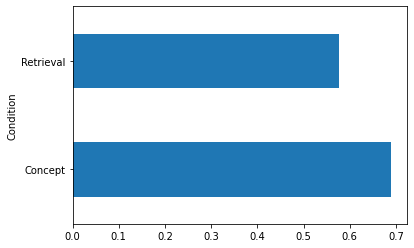

In [8]:
df_kab.groupby("Condition")["PR.2"].mean().plot.barh()


The subjects who made the conecpt maps felt that they learned more than the subjects who practived retrieval.

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PR.2, dtype: object

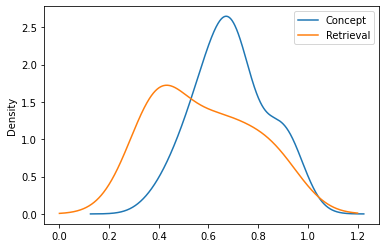

In [10]:
# Participant's predictions of how well they would do is shown as the x-axis. 
# In general those doing concept maps had more confidence that they had learned more!
df_kab.groupby("Condition")["PR.2"].plot.density(legend=True)

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

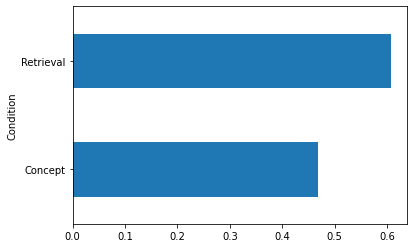

In [3]:
df_kab.groupby("Condition")["TS.2"].mean().plot.barh()

The group that did better on the follow-up learning test one week later was the group that practiced Retrieval.

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TS.avg, dtype: object

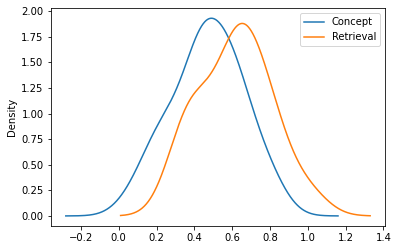

In [12]:
# TS.avg is the average of the first and second scorers' followup learning test scores.
# Here we can clearly see that those who practiced Retrieval actually did better (scored higher)

df_kab.groupby("Condition")["TS.avg"].plot.density(legend=True)

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

0.243953488372093

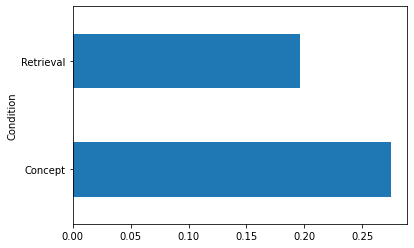

In [4]:
df_kab["prediction_accuracy"] = abs(df_kab["PR.2"] - df_kab["TS.2"])
df_kab.groupby("Condition")["prediction_accuracy"].mean()

df_kab["prediction_outcome"] = (df_kab["PR.2"] - df_kab["TS.2"]).map(lambda x: "Over" if x > 0 else "Under")
df_kab.groupby("Condition")["prediction_accuracy"].mean().plot.barh()
df_kab["prediction_accuracy"].mean()

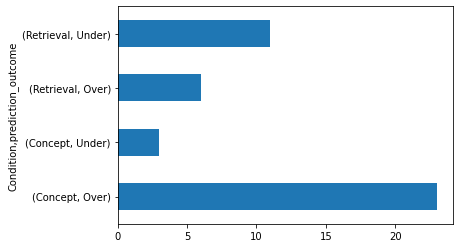

In [5]:
df_kab.groupby(["Condition", "prediction_outcome"]).size().plot.barh()

Students were not very good at predicting the outcome of their test one week in advance. Overall, on average students were about 0.25 points off of their actual score. With the test being score from 0-1, this was a relaly big discrepancy between prediction and actual performance. Taking a look at the two condition subgroups, we see that students who practiced retrieval were slightly better than students who practiced concept mapping at predicting their scores. 
<br/>
<br/>
Perhaps more interesting analysis comes from when we look at whether or not students over or underestimated thier test scores during prediction. We see that students who practiced concept mapping almost always overestimated their scores on the actual test while students who practiced retrieval generally underestimated their test scores.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.